### 1 - Chargement des data

In [20]:
import pandas as pd

df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df.info()
##########
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col="dt", parse_dates=True)
df.info()
##########
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usa

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
...,...,...,...
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe


### 2 - Filtrer les données par pays

In [21]:
#afficher les valeurs uniques de country
#df.Country.unique()

#On va partir du principe que c'est France (Europe qu'on doit choisir)
df_fe = df[df["Country"] == "France (Europe)"]
df_fe.info()

df_fe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             3166 non-null   float64
 1   AverageTemperatureUncertainty  3166 non-null   float64
 2   Country                        3239 non-null   object 
dtypes: float64(2), object(1)
memory usage: 101.2+ KB


,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,7.397,2.097,France (Europe)
1743-12-01,NaN,NaN,France (Europe)
1744-01-01,NaN,NaN,France (Europe)
1744-02-01,NaN,NaN,France (Europe)
1744-03-01,NaN,NaN,France (Europe)
...,...,...,...
2013-05-01,11.476,0.290,France (Europe)
2013-06-01,16.328,0.287,France (Europe)
2013-07-01,21.291,0.376,France (Europe)


### 3 - Filtrer les données par range de date (1800 -> maintenant)

In [22]:
df_fe_1800_now = df_fe['1800':]
df_fe_1800_now

#Il y a un pb. 2013 n'est pas complète. On va devoir s'arreter à 2012
df_fe_1800_now = df_fe['1800':'2012']
df_fe_1800_now

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1800-01-01,3.914,2.194,France (Europe)
1800-02-01,3.300,5.026,France (Europe)
1800-03-01,4.582,4.286,France (Europe)
1800-04-01,11.619,2.144,France (Europe)
1800-05-01,14.931,1.561,France (Europe)
...,...,...,...
2012-08-01,20.633,0.442,France (Europe)
2012-09-01,15.964,0.371,France (Europe)
2012-10-01,12.122,0.281,France (Europe)


### 3 bis - Petit clean

In [23]:
# On vire la colonne uncertainty
del df_fe_1800_now["AverageTemperatureUncertainty"]
df_fe_1800_now

,AverageTemperature,Country
dt,,
1800-01-01,3.914,France (Europe)
1800-02-01,3.300,France (Europe)
1800-03-01,4.582,France (Europe)
1800-04-01,11.619,France (Europe)
1800-05-01,14.931,France (Europe)
...,...,...
2012-08-01,20.633,France (Europe)
2012-09-01,15.964,France (Europe)
2012-10-01,12.122,France (Europe)


### 4 - Ajout des années manquantes

In [35]:
#on va récupérer les valeurs du table de la page wikipédia
df_last_years = pd.read_html("https://fr.wikipedia.org/wiki/Climat_de_la_France")[0]
df_last_years
#On voit qu'on a un problème car les décimales sont pas au bon format => ","
df_last_years = pd.read_html("https://fr.wikipedia.org/wiki/Climat_de_la_France",decimal=',',thousands='.')[0]
df_last_years

#On clean les lignes qu'on veut pas
df_last_years.drop(df_last_years.index[11:], axis=0, inplace=True)
df_last_years

df_last_years.drop(df_last_years.index[0], axis=0, inplace=True)
df_last_years

#on clean les colonnes qu'on veut pas
df_last_years.drop(df_last_years.columns[2:], axis=1, inplace=True)
df_last_years

#on redéfinit l'index
pd.to_datetime(df_last_years["Année"], format='%Y')
df_last_years.set_index("Année", inplace=True)
df_last_years

#on change l'ordre
df_last_years.sort_index(ascending=True, inplace=True)
df_last_years

,Moyenne annuelle
Année,
2013,12.4
2014,13.8
2015,13.6
2016,13.1
2017,13.4
2018,13.9
2019,13.7
2020,14.1
2021,12.9


### 5 - On merge les 2 dataframes

In [25]:
#on enleve la colonne country dont on a plus besoin
df_fe_1800_now = df_fe_1800_now.drop(df_fe_1800_now.columns[1], axis=1)
df_fe_1800_now

,AverageTemperature
dt,
1800-01-01,3.914
1800-02-01,3.300
1800-03-01,4.582
1800-04-01,11.619
1800-05-01,14.931
...,...
2012-08-01,20.633
2012-09-01,15.964
2012-10-01,12.122


In [39]:
#on va faire un resample de ce df pour n'avoir que des années et plus des mois
df_fe_1800_now_year = df_fe_1800_now.resample("Y").mean()
df_fe_1800_now_year
df_fe_1800_now_year.index = pd.to_datetime(df_fe_1800_now_year.index, format='%Y-%m-%d').year
df_fe_1800_now_year

#On peut ensuite merger les 2 df
df_final = pd.concat([df_fe_1800_now_year,df_last_years])
df_final

#On a un petit problème, on va juste renommer la colonne du df_last_year
df_last_years.rename(columns={'Moyenne annuelle':'AverageTemperature'}, inplace=True)
df_last_years

#On peut ensuite merger les 2 df
df_final = pd.concat([df_fe_1800_now_year,df_last_years])
df_final

,AverageTemperature
1800,10.661917
1801,10.736667
1802,10.735917
1803,10.182333
1804,10.708417
...,...
2018,13.9
2019,13.7
2020,14.1
2021,12.9


### 6 - Affichage brut des data

In [43]:
import matplotlib

<Axes: >

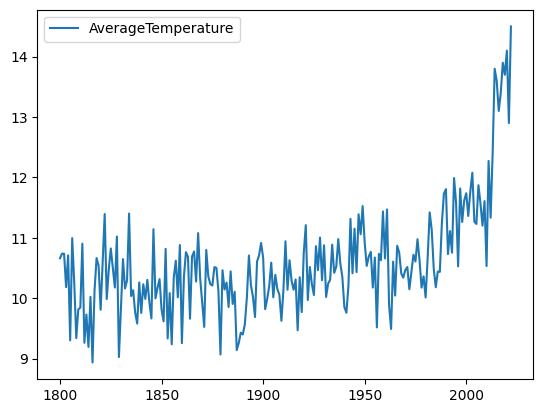

In [57]:
#df_final.plot()
#Erreur no numeric data to plot
#df_final.dtypes
df_final["AverageTemperature"] = df_final["AverageTemperature"].astype("float")
df_final.dtypes
df_final.plot()